***Setup โหลดข้อมูลจาก Dataset***

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [ ]:
import matplotlib as mpt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.gridspec import GridSpec

data = pd.read_csv("https://raw.githubusercontent.com/plaipmc/CS265_Heart_disease_diagonosis/main/heart.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


เช็ตว่ามีค่า Null หรือไม่

In [ ]:
#checking and cleaning zone
data.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             918 non-null    bool 
 1   Sex             918 non-null    bool 
 2   ChestPainType   918 non-null    bool 
 3   RestingBP       918 non-null    bool 
 4   Cholesterol     918 non-null    bool 
 5   FastingBS       918 non-null    bool 
 6   RestingECG      918 non-null    bool 
 7   MaxHR           918 non-null    bool 
 8   ExerciseAngina  918 non-null    bool 
 9   Oldpeak         918 non-null    bool 
 10  ST_Slope        918 non-null    bool 
 11  HeartDisease    918 non-null    bool 
dtypes: bool(12)
memory usage: 10.9 KB


ข้อมูลของแต่ละ Column
1.    Age: อายุของผู้ป่วย [หน่วยปี]
2.    Sex: เพศของผู้ป่วย [M: Male/ผู้ชาย, F: Female/ผู้หญิง]
3.    ChestPainType: ประเภทอาการเจ็บหน้าอก [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4.    RestingBP: ความดันโลหิตขณะพัก [mm Hg]
5.    Cholesterol: คอเลสเตอรอลในเลือด [mm/dl]
6.    FastingBS: น้ำตาลในเลือดขณะอดอาหาร [1: ถ้า FastingBS > 120 mg/dl, 0: อื่นๆ]
7.    RestingECG: ผลการตรวจคลื่นไฟฟ้าหัวใจขณะพัก [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8.    MaxHR: อัตราการเต้นหัวใจสูงสุดที่ทำได้ [ค่าตัวเลขระหว่าง 60 ถึง 202]
9.    ExerciseAngina: angina ที่เกิดจากการออกกำลังกาย [Y: ใช่ N: ไม่ใช่]
10.  Oldpeak: oldpeak = ST [ค่าการเปลี่ยนแปลงคลื่นไฟฟ้าของหัวใจ]
11.   ST_Slope: ความชันของ T-wave ที่เกิดจาก ECG plot(ST segment) [Up: upsloping, Flat: flat, Down: downsloping]
12.   HeartDisease: ผลการวินิจฉัย [1: heart disease, 0: Normal]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


***แบ่งประเภทเป็นข้อมูลเชิงคุณภาพ และเชิงปริมาณ*** โดยจะได้ว่า

ข้อมูลเชิงคุณภาพประกอบด้วย 'Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease'

ข้อมูลเชิงปริมาณได้แก่ 'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'

In [ ]:
data['HeartDisease'] = data['HeartDisease'].astype('category')
data['FastingBS'] = data['FastingBS'].astype('category')
data['HeartDisease'] = data['HeartDisease'].cat.rename_categories({1: 'Yes', 0: 'No'})
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,No
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,Yes
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,No
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,Yes
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,No


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = data.select_dtypes(include=numerics).columns
numerical_columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], dtype='object')

In [ ]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
       'ST_Slope', 'HeartDisease'],
      dtype='object')

***Data analysis และ Data Visualization***

นำข้อมูล 2 ประเภทมาทำ Data visualization พร้อมวิเคราะห์

ส่วนที่ 1 การวิเคราะห์และ Visualization ข้อมูลเชิงคุณภาพ หรือ Categorical Features

In [ ]:
# Function ในการสร้าง Pie chart ของ Categorical Features
def pie_charts(data, feature, target):
    colors = sns.color_palette('colorblind')[0:5]
    fig,axes = plt.subplots(1,2,figsize=(12,8))
    labels = data[feature].unique()
    textprops = {"fontsize":15}

    axes[0].pie(data[data[target]=="No"][feature].value_counts(),colors=colors, labels=labels,autopct='%1.1f%%',textprops =textprops)
    axes[0].set_title('No {}'.format(target),fontsize=15)
    axes[1].pie(data[data[target]=="Yes"][feature].value_counts(),colors=colors, labels=labels,autopct='%1.1f%%',textprops =textprops)
    axes[1].set_title('Yes {}'.format(target),fontsize=15)

    plt.legend(title = feature, fontsize=15, title_fontsize=15)
    plt.show()

In [ ]:
# Function ในการคำนวณ Probability
def probability_calculation(feature, feature_values) : 
    
    first_with_heart_disease = len(data[(data['HeartDisease']=='Yes') & (data[feature]==feature_values[0])])
    num_first_value = len(data[data[feature]==feature_values[0]])

    second_with_heart_disease = len(data[(data['HeartDisease']=='Yes') & (data[feature]==feature_values[1])])
    num_second_value = len(data[data[feature]==feature_values[1]])

    print("\n" + feature + " : \n")
    print('👉 Probability of {} : {} to have Heart disease:'.format(feature,feature_values[0]), first_with_heart_disease/num_first_value)
    print('👉 Probability of {} : {} to have Heart disease:'.format(feature,feature_values[1]), second_with_heart_disease/num_second_value)

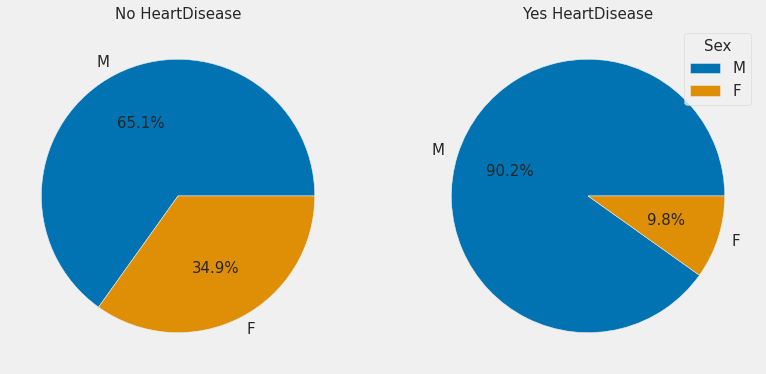


Sex : 

👉 Probability of Sex : M to have Heart disease: 0.6317241379310344
👉 Probability of Sex : F to have Heart disease: 0.25906735751295334


In [ ]:
pie_charts(data,"Sex","HeartDisease")
probability_calculation('Sex', ['M', 'F'])

💡 ข้อสังเกต : ผู้ป่วยโรคหัวใจส่วนใหญ่เป็นผู้ชายมากกว่าผู้หญิง และ ผู้ชายมีความเป็นไปได้ที่จะเป็นโรคหัวใจมากกว่าผู้หญิงถึง 3 เท่า

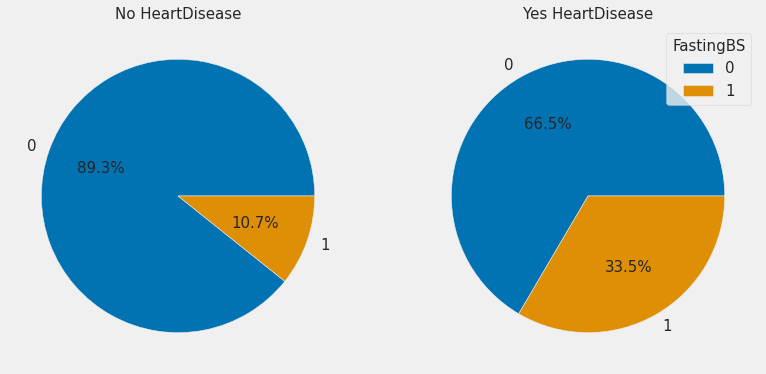


FastingBS : 

👉 Probability of FastingBS : 1 to have Heart disease: 0.794392523364486
👉 Probability of FastingBS : 0 to have Heart disease: 0.48011363636363635


In [ ]:
pie_charts(data,"FastingBS","HeartDisease")
probability_calculation("FastingBS", [1,0])

💡 ข้อสังเกต : 33.5% ของผู้ป่วยโรคหัวใจมีน้ำตาลในเลือดขณะอดอาหารมากกว่า 120 mg/dl. และ ผู้ที่มีน้ำตาลในเลือดขณะอดอาหารมากกว่า 120 mg/dl.มีความเป็นไปได้ที่จะเป็นโรคหัวใจถึง 79%

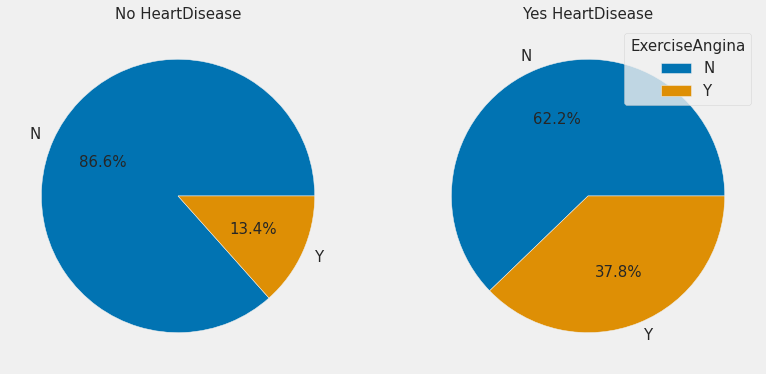


ExerciseAngina : 

👉 Probability of ExerciseAngina : Y to have Heart disease: 0.8517520215633423
👉 Probability of ExerciseAngina : N to have Heart disease: 0.3510054844606947


In [ ]:
pie_charts(data,"ExerciseAngina","HeartDisease")
probability_calculation('ExerciseAngina', ['Y', 'N'])

💡 ข้อสังเกต : 62.2% ของผู้ที่เป็นโรคหัวใจเกิด Angina ที่เกิดจากการออกกำลังกาย และ ผู้ที่มี Angina ที่เกิดจากการออกกำลังกายมีความเป็นไปได้ที่จะเป็นโรคหัวใจมากถึง 85%

In [ ]:
# Function ในการ plot bar chart สำหรับ Categorical features
def distribution_categorical_features(data, feature, target, colors) :
    sns.set(rc={'figure.figsize':(14,8.27)},font_scale=1.2)
    grouped_columns = sns.countplot(x=feature, hue=target, data=data,palette=colors)
    grouped_columns.set_title('Countplot for {} {}'.format(target, feature))

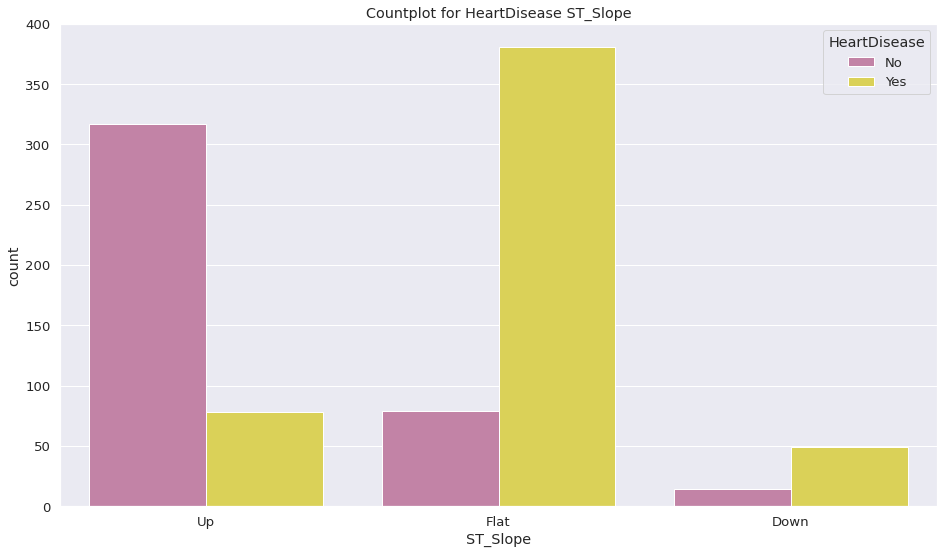

In [ ]:
distribution_categorical_features(data, "ST_Slope", "HeartDisease", ["#cc79a7","#f0e442"])

💡 ข้อสังเกต : ผู้ที่เป็นโรคหัวใจส่วนใหญ่พบว่าค่า ST_Slope เป็น Flat 

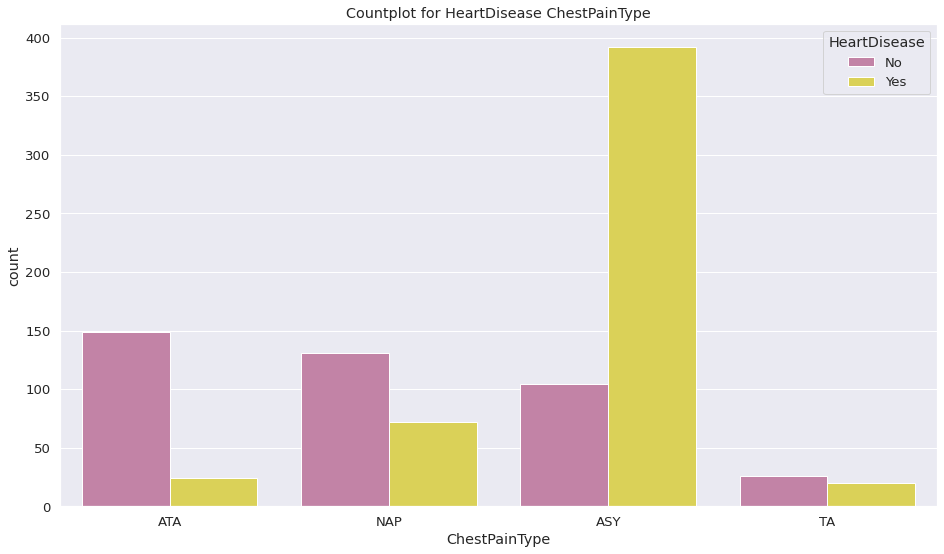

In [ ]:
distribution_categorical_features(data, "ChestPainType", "HeartDisease", ["#cc79a7","#f0e442"])

💡 ข้อสังเกต : ผู้ที่เป็นโรคหัวใจส่วนใหญ่พบว่ามีอาการเจ็บหน้าอกในประเภท ASY

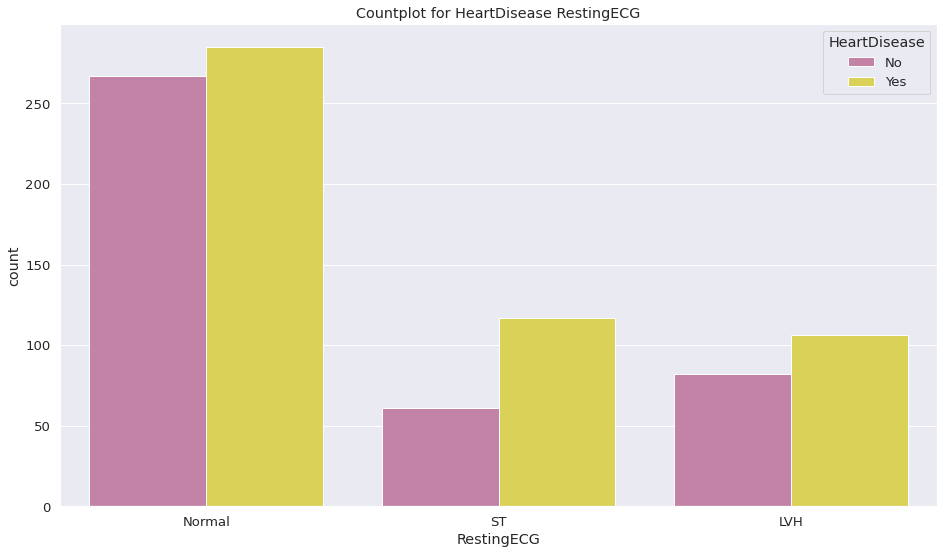

In [ ]:
distribution_categorical_features(data, "RestingECG", "HeartDisease", ["#cc79a7","#f0e442"])

💡 ข้อสังเกต : ผู้ที่เป็นโรคหัวใจส่วนใหญ่พบว่ามีผลการตรวจคลื่นไฟฟ้าหัวใจขณะพักแบบปกติ พอๆกับผู้ที่ไม่ได้เป็นโรคหัวใจ และ ในประเภท ST และ LVH จะพบผู้ป่วยโรคหัวใจมากกว่าคนปกติ ซึ่งสรุปได้ว่า ผลการตรวจคลื่นไฟฟ้าหัวใจในขณะพักนั้นไม่สามารถนำมาเป็นเกณฑ์ในการวินิจฉัยโรคหัวใจได้เนื่องจากไม่มีความแตกต่างระหว่างคนปกติและผู้ป่วยโรคหัวใจ

ส่วนที่ 2 การวิเคราะห์และ Visualization ข้อมูลเชิงปริมาณ หรือ Numerical Features

In [ ]:
def kde_numerical_features(column, target) : 
    fig, ax = plt.subplots(figsize = (13,5))
    sns.kdeplot(data[data[target]=='Yes'][column], alpha=0.5,shade = True, color="#d55e00", label="HeartDisease", ax = ax)
    sns.kdeplot(data[data[target]=='No'][column], alpha=0.5,shade = True, color="#f0e442", label="NoHeartDisease ", ax = ax)
    plt.title('KDE-Plot of {}'.format(column), fontsize = 18)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.legend();
    plt.show()

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


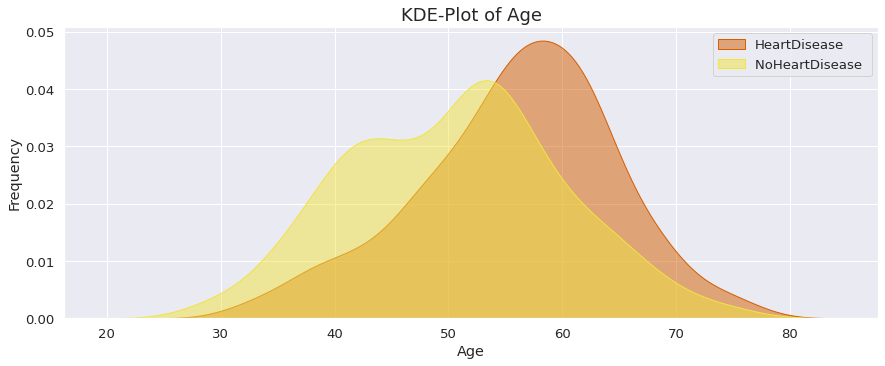

In [ ]:
kde_numerical_features('Age', 'HeartDisease')

💡 ข้อสังเกต : 
- อายุเฉลี่ยของผู้ป่วยโรคหัวใจคือ 53 ปี
- ผู้ป้วยโรคหัวใจส่วนใหญ่มักจะมีอายุระหว่าง 55 - 65 ปี

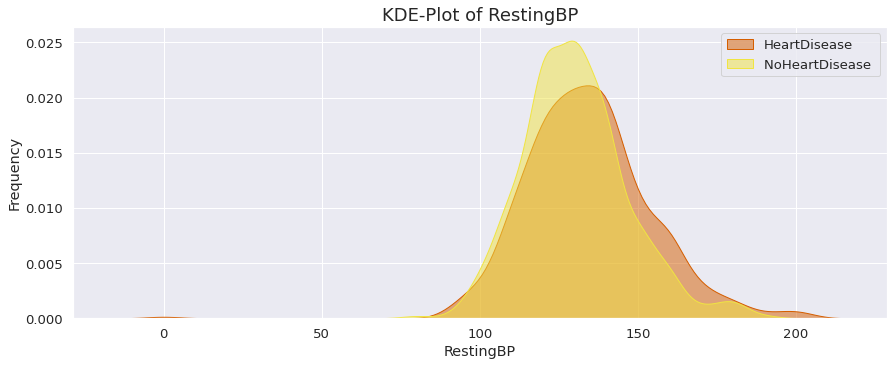

In [ ]:
kde_numerical_features('RestingBP', 'HeartDisease')

💡 ข้อสังเกต : 

- ความดันปกติคือ 120/80 mmHg
- ผู้ป้วยโรคหัวใจส่วนใหญ่มักจะมีความดันขณะพักระหว่าง 120-150 mmHg

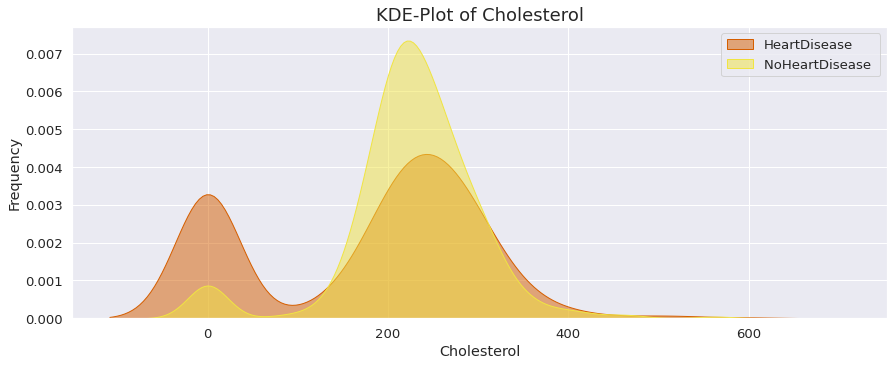

In [ ]:
kde_numerical_features('Cholesterol', 'HeartDisease')

💡 ข้อสังเกต : 

- ปริมาณคอเลสเตอรอลในเลือดเฉลี่ยเท่ากับ 198.7 mm/dl


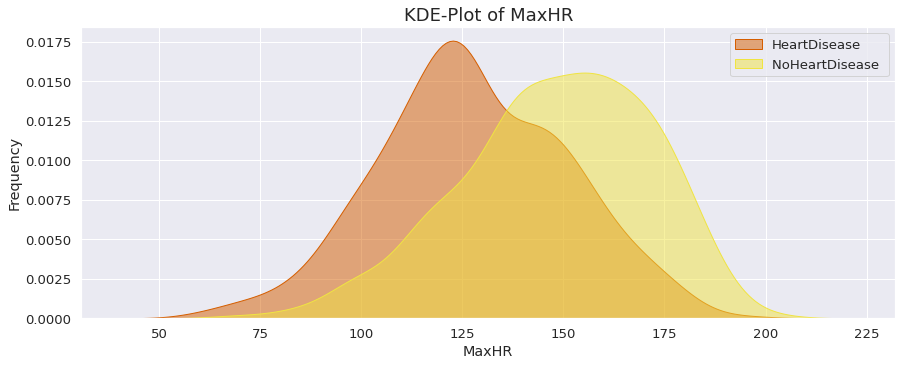

In [ ]:
kde_numerical_features('MaxHR', 'HeartDisease')

💡 ข้อสังเกต : 

- ผู้ป่วยโรคหัวใจมีค่าอัตราการเต้นหัวใจสูงสุดที่ทำได้ระหว่าง 110 - 130 

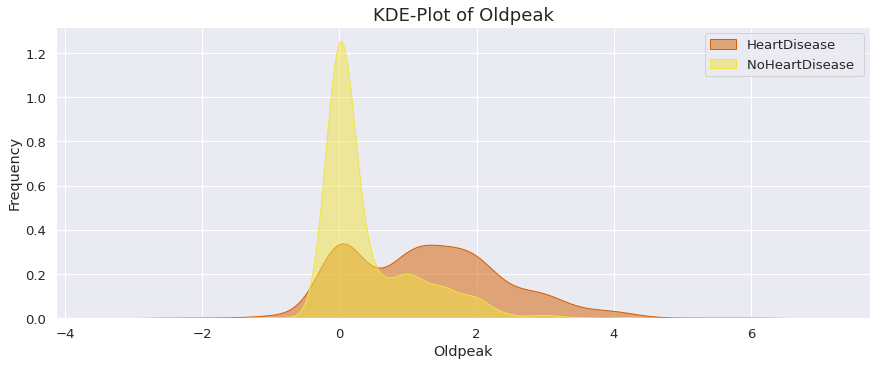

In [ ]:
kde_numerical_features('Oldpeak', 'HeartDisease')

💡 ข้อสังเกต : 

- คนปกติส่วนใหญ่จะมีค่า Oldpeak เท่ากับ 0
- ผู้ป่วยโรคหัวใจจะมีค่า Oldpeak ตั้งแต่ 0 - 4

***Feature Engineering***

จัดการข้อมูล Feature บางส่วนก่อนนำไปใช้ในการ Train model

โดยการเปลี่ยนข้อมูล Categorical feature ให้เป็น Feature แยกกันด้วย One Hot Encoder และดึงข้อมูล Valid เท่านั้น

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
df1 = data[data.Cholesterol != 0]
df1 = df1[df1.RestingBP > 70]

In [ ]:
final_df = pd.get_dummies(df1, columns=categorical_columns[:-1])
final_df['HeartDisease'] = final_df['HeartDisease'].cat.rename_categories({'Yes':1 , 'No': 0})
X = final_df.drop(columns=["HeartDisease"], axis=1)
y = final_df['HeartDisease']
standardizer = StandardScaler()
X_scaled = standardizer.fit_transform(X)
final_df

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,49,160,180,156,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,98,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,48,138,214,108,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54,150,195,122,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,1.2,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
914,68,144,193,141,3.4,1,0,1,1,0,...,0,1,0,1,0,1,0,0,1,0
915,57,130,131,115,1.2,1,0,1,1,0,...,1,0,0,1,0,0,1,0,1,0
916,57,130,236,174,0.0,1,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0


***Train model***

จากงานวิจัยที่ศึกษาก่อนหน้านี้ พบว่ามีหลายหลาย Model ที่ใช้ในการวินิฉัยโรคหัวใจจาก Dataset ต่างๆ ได้แก่ Reinforcement Learning, Linear Regression, Support Vector Machine, Logistic Regression, Correlation matrix, K neighbors Classifier, Random Forest Classifier, Decision Tree Classifier, Naive Bayes

แต่ว่าเนื่องจาก Dataset ที่นำมาใช้นั้นมีการ Predict แค่ 0-1 จึงจะต้องใช้ Binary Classification ได้แก่ Support Vector Machine, Logistic Regression, K neighbors Classifier, Random Forest Classifier, Decision Tree Classifier, Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# แบ่ง Train data และ Test data
test_size = 0.25
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = test_size, random_state=42)

In [ ]:
models = {}

# Support Vector Machines
models['Support Vector Machines'] = LinearSVC(max_iter=2000)

# Logistic Regression
models['Logistic Regression'] = LogisticRegression()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

# Random Forest
models['Random Forest'] = RandomForestClassifier()

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

In [ ]:
accuracy, precision, recall, f1= {}, {}, {}, {}

for key in models.keys():
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_val)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_val)
    precision[key] = precision_score(predictions, y_val)
    recall[key] = recall_score(predictions, y_val)
    f1[key] = f1_score(predictions, y_val)

In [ ]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1 Score'] = f1.values()

df_model.sort_values(by='Accuracy',ascending=False).style.background_gradient('twilight')

,Accuracy,Precision,Recall,F1 Score
Random Forest,0.898396,0.877778,0.908046,0.892655
Naive Bayes,0.887701,0.866667,0.896552,0.881356
Support Vector Machines,0.882353,0.866667,0.886364,0.876404
K-Nearest Neighbor,0.882353,0.911111,0.854167,0.881720
Logistic Regression,0.871658,0.844444,0.883721,0.863636
Decision Trees,0.823529,0.800000,0.827586,0.813559


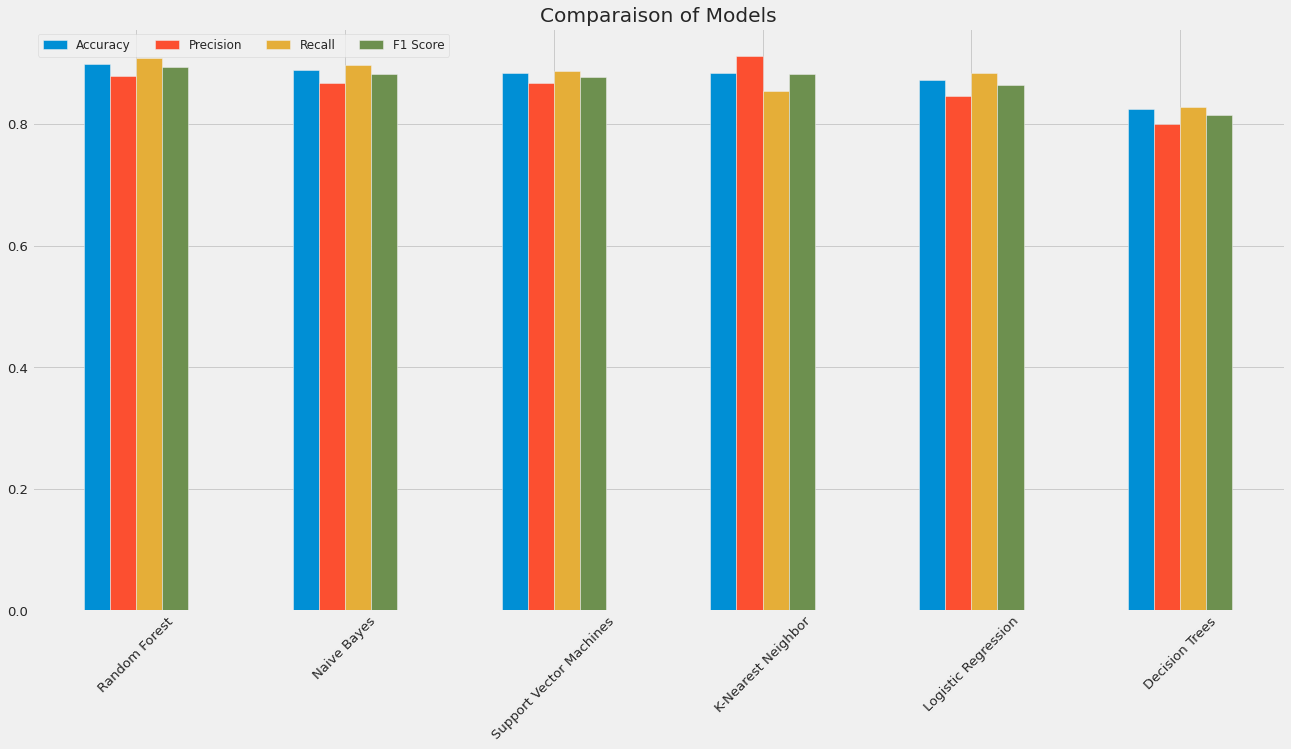

In [ ]:
plt.style.use('fivethirtyeight') 
plt.rcParams["figure.figsize"] = (20,10)
ax = df_model.sort_values(by='Accuracy',ascending=False).plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='upper left',prop={'size': 12})
ax.title.set_text('Comparaison of Models')

💡 ข้อสรุป : เนื่องจากค่า Accuracy หรือความแม่นยำของ Model Random Forest นั้นมากที่สุดสำหรับ Dataset นี้ จึงเลือกใช้ Model Random Forest ในการเป็น Model หลัก

# **Please enter your information**

In [ ]:
# Get input from user or patient
sexvalid = ("M","F")
typevalid = ("TA","ATA","NAP","ASY")
sugarvalid = (1,0)
resultvalid = ("Normal","ST","LVH")
exvalid = ("Y","N")
slopevalid = ("Up","Flat","Down")

print("Please fill out information correctly and completely")
age = int(input("Eenter your age : "))
sex = str(input("Enter your sex(M:Male/F:Female) : "))
while sex not in sexvalid:
  sex = str(input("Invalid sex input, please fill out again with M or F : "))

print("\nPlease describe your chest pain from this following symptoms.")
print(" 1.TA: Typical Angina - เจ็บกลางอก,เจ็บมากขึ้นถ้าออกแรง,มีอาการดีขึ้นหากพักผ่อน")
print(" 2.ATA: Atypical Angina - จะเป็นอาการเจ็บหน้าอกอื่นๆที่นอกเหนือจาก Typical Angina เช่น เจ็บหน้าอกแบบแหลมเสียดๆ หรือเจ็บที่หน้าอกด้านซ้าย")
print(" 3.NAP: Non-Anginal Pain - มีอาการยอกเหนือจาก 2 ข้อแรก")
print(" 4.ASY: Asymptomatic - ไม่มีอาการผิดปกติหรือเจ็บปวดใดๆ\n")
cptype = str(input("Enter your chest pain type from upon (EX. TA) : "))
while cptype not in typevalid:
  cptype = str(input("Invalid type input, please fill out again with TA or ATA or NAP or ASY : "))

bp = int(input("Enter resting blood pressure [mm/Hg] : "))
chol = int(input("Enter cholesterol in your blood [mm/dl] : "))
bsugar = int(input("Enter fasting blood sugar [mg/dl](1: FastingBS > 120 mg/dl, 0: other cases) : "))
while bsugar not in sugarvalid:
  bsugar = str(input("Invalid input, please fill out again with 1 or 0 : "))

print("\nResult of Electrocardiogram(ECG result)\n Normal: Normal\n ST: having ST-T wave abnormality(T wave inversions and/or ST elevation or depression of > 0.05 mV)\n LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria\n")
ecg = str(input("Enter Electrocardiogram result (Normal/ST/LVH) : "))
while ecg not in resultvalid:
  ecg = str(input("Invalid ECG-result input, please fill out again with Normal or ST or LVH : "))

maxhr = int(input("Enter your max heart rate (59 < Max Heart Rate < 203) : "))
while maxhr<60 or maxhr>202:
  maxhr = int(input("Invalid max heart rate input, please enter in range 60-202 : "))

exangina = str(input("Does your chest pain come from exercise[ExerciseAngina]? (Y/N) : "))
while exangina not in exvalid:
  exangina = str(input("Invalid input, please fill out again with Y or N : "))

oldpeak = float(input("Enter the peak exercise of T-wave from ECG plot : "))
slopest = str(input("How is the slope of the peak exercise ST segment? (Up: upsloping, Flat: flat, Down: downsloping) : "))
while slopest not in slopevalid:
  slopest = str(input("Invalid slope input, please fill out again with Up or Flat or Down : "))

Please fill out information correctly and completely
Eenter your age : 45
Enter your sex(M:Male/F:Female) : M

Please describe your chest pain from this following symptoms.
 1.TA: Typical Angina - เจ็บกลางอก,เจ็บมากขึ้นถ้าออกแรง,มีอาการดีขึ้นหากพักผ่อน
 2.ATA: Atypical Angina - จะเป็นอาการเจ็บหน้าอกอื่นๆที่นอกเหนือจาก Typical Angina เช่น เจ็บหน้าอกแบบแหลมเสียดๆ หรือเจ็บที่หน้าอกด้านซ้าย
 3.NAP: Non-Anginal Pain - มีอาการยอกเหนือจาก 2 ข้อแรก
 4.ASY: Asymptomatic - ไม่มีอาการผิดปกติหรือเจ็บปวดใดๆ

Enter your chest pain type from upon (EX. TA) : NAP
Enter resting blood pressure [mm/Hg] : 160
Enter cholesterol in your blood [mm/dl] : 180
Enter fasting blood sugar [mg/dl](1: FastingBS > 120 mg/dl, 0: other cases) : 0

Result of Electrocardiogram(ECG result)
 Normal: Normal
 ST: having ST-T wave abnormality(T wave inversions and/or ST elevation or depression of > 0.05 mV)
 LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria

Enter Electrocardiogram result (Norma

In [ ]:
dataForPredict = df1.iloc[[243,244,245,246,247,256]]
dataForPredict = dataForPredict.drop('HeartDisease',axis=1)
new_row = {'Age':age, 'Sex':sex, 'ChestPainType':cptype,'RestingBP':bp, 'Cholesterol':chol, 'FastingBS':bsugar, 'RestingECG':ecg, 'MaxHR':maxhr,'ExerciseAngina':exangina, 'Oldpeak':oldpeak, 'ST_Slope':slopest}
dataForPredict = dataForPredict.append(new_row, ignore_index=True)
final_df2 = pd.get_dummies(dataForPredict, columns=categorical_columns[:-1])
final_df3 = final_df2.tail(1)

accuracy = 0
#while accuracy < 0.90:
randomForestModel = RandomForestClassifier()
randomForestModel.fit(X_train, y_train)
predictions = randomForestModel.predict(X_val)
accuracy= accuracy_score(predictions, y_val)
predictions2 = randomForestModel.predict(final_df3.values)

print(accuracy)
print(predictions2)

result = ''
if predictions2 == 0:
  result = 'Normal'
else:
  result = 'Has a possibility to have a Heart disease'

0.893048128342246
[0]


In [ ]:
# Output from User or patient

print("ผลการคำนวณนี้สามารถใช้ได้เฉพาะประกอบการตัดสินใจในการไปพบแพทย์เท่านั้น")
print("Age : ",age) 
print("Sex : ",sex)
print("Chest pain type : ",cptype)
print("Blood pressure at rest result(mm/Hg) : ",bp)
print("Blood Cholesterol result(mm/dl) : ",chol)
print("Resting heart rate results : ",ecg)
print("The maximum achievable heart rate : ",maxhr)
print("Oldpeak : ",oldpeak)
print("the results of your heart disease analysis : ",result)
if predictions2 == 0:
  print("\nจากข้อมูลดังกล่าว สามารถนำได้คำนวณได้ว่า 'คุณแทบไม่มีโอกาสเป็นโรคหัวใจหรือมีโอกาสเป็นโรคหัวใจน้อยมาก' ทั้งนี้เพื่อความแน่ใจกรุณาให้แพทย์ได้วินิจฉัยอีกครั้ง")
else:
  print("\nจากข้อมูลดังกล่าว สามารถนำได้คำนวณได้ว่า 'คุณมีโอกาสที่จะเป็นโรคหัวใจมาก' ทั้งนี้เพื่อความแน่ใจกรุณาให้แพทย์ได้วินิจฉัยอีกครั้ง")

ผลการคำนวณนี้สามารถใช้ได้เฉพาะประกอบการตัดสินใจในการไปพบแพทย์เท่านั้น
Age :  45
Sex :  M
Chest pain type :  NAP
Blood pressure at rest result(mm/Hg) :  160
Blood Cholesterol result(mm/dl) :  180
Resting heart rate results :  Normal
The maximum achievable heart rate :  156
Oldpeak :  1.0
the results of your heart disease analysis :  Normal

จากข้อมูลดังกล่าว สามารถนำได้คำนวณได้ว่า 'คุณแทบไม่มีโอกาสเป็นโรคหัวใจหรือมีโอกาสเป็นโรคหัวใจน้อยมาก' ทั้งนี้เพื่อความแน่ใจกรุณาให้แพทย์ได้วินิจฉัยอีกครั้ง
